In [108]:
import time

import mysql.connector
from Params import hostSQL, userSQL, passwdSQL, databaseSQL
import os
import json
import pandas as pd

import matplotlib.pyplot as plt 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

import nltk
from nltk.corpus import stopwords



In [109]:

mydb = mysql.connector.connect(
    host=hostSQL,
    user=userSQL,
    passwd=passwdSQL,
    auth_plugin='mysql_native_password',
    database=databaseSQL
)

mycursor = mydb.cursor()


In [110]:
sql = 'SELECT * FROM chatroom'
mycursor.execute(sql)
chatlog = mycursor.fetchall()

sql = 'DESCRIBE chatroom'
mycursor.execute(sql)
chatDescribe = mycursor.fetchall()

columns = []
for i in chatDescribe:
    columns.append(i[0])

df = pd.DataFrame(chatlog, columns=columns)

df['chat_line'] = df.chat_line.str[:-1]

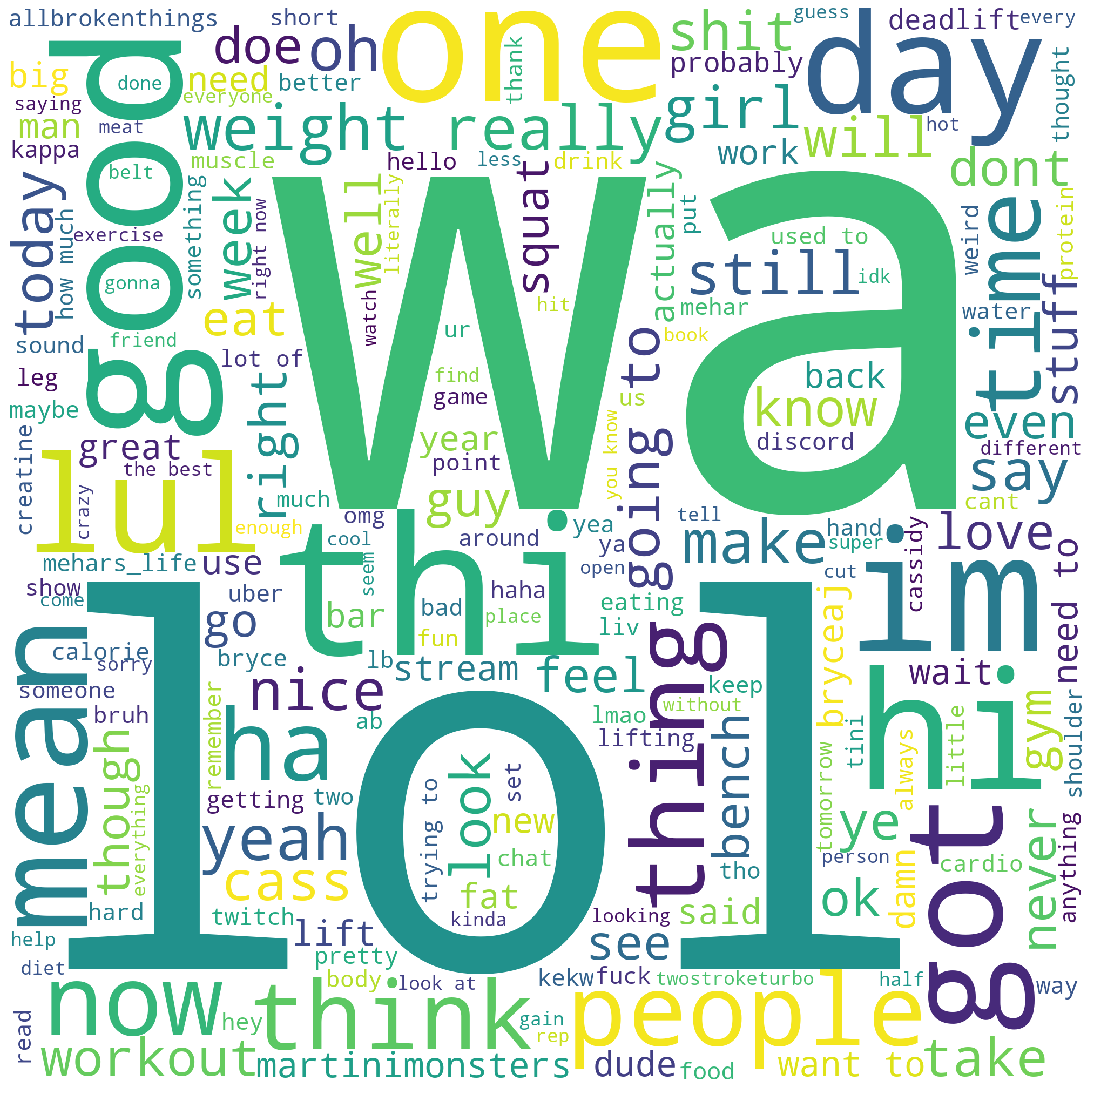

In [54]:
martonoChat = df[df['chatchannel'] == 'martinimonsters']

from wordcloud import WordCloud, STOPWORDS

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in martonoChat.chat_line: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 2000, height = 2000, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [115]:
np.random.seed(200)

channels = ['ajvie',
            'ayytrae',
            'davinityyy',
             'emandliv',
            'hollytwolf',
            'hottea',
            'kneecoleslaw',
            'laribug',
            'leyla',
            'livstixs',
            'lizelda',
            'martinimonsters',
            'miss_angeliquew',
            'misdelish',
            'nataagataa',
            'officialevelynclaire',
            'pink_sparkles',
            'xoaeriel',
            'yogiibutt']


dfChat = df[df.chatchannel.isin(channels)]

corpus = df[df.chatchannel.isin(channels)].chat_line.tolist()

df.groupby(by='chatchannel').count()

# df[df['chatchannel'] == 'livstixs']


,from_ID,display_name,chat_line,sent_at
chatchannel,,,,
ajvie,2834,2834,2834,2834
arrowfit,1564,1564,1564,1564
averagejoes_oc,24,24,24,24
ayytrae,2440,2440,2440,2440
benrice_plgandalf,8614,8614,8614,8614
calgarybarbell,119,119,119,119
claudsnation,990,990,990,990
davinityyy,862,862,862,862
emandliv,2193,2193,2193,2193


In [116]:
channels

['ajvie',
 'ayytrae',
 'davinityyy',
 'emandliv',
 'hollytwolf',
 'hottea',
 'kneecoleslaw',
 'laribug',
 'leyla',
 'livstixs',
 'lizelda',
 'martinimonsters',
 'miss_angeliquew',
 'misdelish',
 'officialevelynclaire',
 'pink_sparkles',
 'xoaeriel',
 'yogiibutt']

In [92]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)

k = 30
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()


In [93]:
dfChat = dfChat.reset_index()

labels = pd.DataFrame(model.labels_, columns=['label'])

dfChatwLabels = pd.concat([dfChat.iloc[:,1:], labels], axis=1)

dfChatwLabels.groupby(['label']).count()

,index,from_ID,display_name,chat_line,sent_at,chatchannel
label,,,,,,
0,2,2,2,2,2,2
1,1,1,1,1,1,1
2,263,253,263,263,263,263
3,107,107,107,107,107,107
4,102,102,102,102,102,102
5,53,50,53,53,53,53
6,266,260,266,266,266,266
7,156,154,156,156,156,156
8,3,3,3,3,3,3


In [94]:

for i in range(k):
    print('Cluster %d:' % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 nothin
 peanut
 ain
 light
 weight
 fett
 feta
 fetch
 fetching
 fetish
Cluster 1:
 atest
 av
 whipped
 art
 noticed
 optimusangel
 fun
 liv
 cool
 discord
Cluster 2:
 hi
 liv
 tobymanana
 free_aol_cd
 twostroketurbo
 evelyn
 bandslam
 alphageek91
 cass
 martinimonsters
Cluster 3:
 stop
 spamming
 just
 people
 mateoceltarra
 lazy
 talking
 pls
 davetherave444
 got
Cluster 4:
 clap
 pogchamp
 ez
 esfandokay
 effor
 lewiee
 angelthump
 pepega
 feelsgoodman
 poggers
Cluster 5:
 nah
 im
 good
 just
 time
 times
 real
 pixelated
 bipolar
 joke
Cluster 6:
 right
 like
 know
 click
 im
 oh
 lol
 work
 arm
 playing
Cluster 7:
 big
 ass
 legs
 brain
 just
 door
 angle
 got
 boy
 tupac
Cluster 8:
 celestialfitness
 tv
 emandliv
 heavy
 ass
 check
 lift
 weight
 twitch
 like
Cluster 9:
 instagram
 follow
 kneecoleslaw
 http
 hot_tea101
 fetching
 festivals
 feta
 fetch
 fetish
Cluster 10:
 lol
 like
 just
 im
 yes
 nice
 oh
 yeah
 got
 hey
Cluster 11:
 music
 play
 love
 taste
 betty

In [96]:
cassChatwLabels[cassChatwLabels['label'] == 8]

,from_ID,display_name,chat_line,sent_at,chatchannel,label
43,NaN,mileskyc,Yeah I tried to lean bulk and just bulked #got...,2020-04-28 21:44:02,martinimonsters,8
48,NaN,sudobiologist,"yeah, half a pound a week",2020-04-28 21:44:32,martinimonsters,8
73,NaN,mileskyc,Yeah I just want to be near a weight I feel sa...,2020-04-28 21:48:35,martinimonsters,8
145,NaN,ubercruzer,yeah they're external,2020-04-28 22:02:24,martinimonsters,8
414,NaN,copperhead191,"yeah she did, she grew up in nyc slums",2020-04-28 22:49:52,martinimonsters,8
...,...,...,...,...,...,...
11328,88785194.0,ubercruzer,yeah. basically. lol. @Hotrodsandtrexs,2020-05-14 22:35:07,martinimonsters,8
11488,97004843.0,hotrodsandtrexs,yeah im brom coquitlam,2020-05-14 22:48:56,martinimonsters,8
11833,108828157.0,neverforgetsolaire,"Yeah yeah, just go back to lurking on r/conser...",2020-05-14 23:36:34,martinimonsters,8
11963,35925104.0,caution646,"yeah, but we'll make up for it later",2020-05-15 00:01:10,martinimonsters,8


In [60]:
cassChatwLabels[cassChatwLabels['label'] == 0].chat_line.tolist()

r',
 'I want sushi',
 'i want sushi',
 'mehar you will learn to love the shirts',
 'I love deadlifting',
 "what's the science behind a curved bar and a straight bar or it some hipster stuff to have a cruved bar Kappa",
 'alcohol is bad for you',
 "You'll run into another limit",
 'I love the sound of rain',
 'tfw cass doesnt redeem your ez button points',
 '@BryceAJ nooo',
 'Thats what I was wanting',
 'Cass has the following certification',
 'Thats not bad at all',
 "Runnings bad for me, i hate it and that's bad",
 'Running is defo bad tried today and royally messed myself up',
 "BryceAJ isn't that what you eat?",
 'BryceAJ is is that only one cheat weeks?',
 'I love this',
 'You working out is wat I love . More ppl should do this',
 'I also focus on compounds more and thats also taxing',
 'thats whats up',
 'monstersGLUTES',
 'Thats when I go for coke @katas7rophe',
 'thats me tho',
 "it's UBER",
 'damn how you get those huge calves uber',
 'sup uber',
 'NIce butt Uber',
 "ooh there'